# Correction_Loan Prediction Assignment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
data = pd.read_csv("Loan Prediction data.csv")

df = data.copy()
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [9]:
missing_values = df.isnull().sum()


missing_values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
duplicated_values = df.duplicated().sum()

duplicated_values

0

In [13]:
df.describe(include="all")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [15]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Cleaning Numerical Values

In [ ]:
#numerical_columns = df.select_dtypes("float64", "int64").columns

In [7]:
numerical_columns = ['ApplicantIncome','CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
       'Credit_History']

numerical_columns

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [19]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [21]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [9]:
#Fill missing numerical_columns
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

### Cleaning Categorical Values

In [13]:
categorical_columns = df.select_dtypes("object").columns

categorical_columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [27]:
missing_values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
#Fill Nan Categorical variables

for missing_cat_val in ['Gender', 'Married', 'Dependents', 'Self_Employed']:
    df[missing_cat_val].fillna(df[missing_cat_val].mode()[0], inplace=True)

In [16]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [33]:
df["Dependents"].unique()

array(['0', '1', '2', '3+'], dtype=object)

### Check for and Remove Outliers

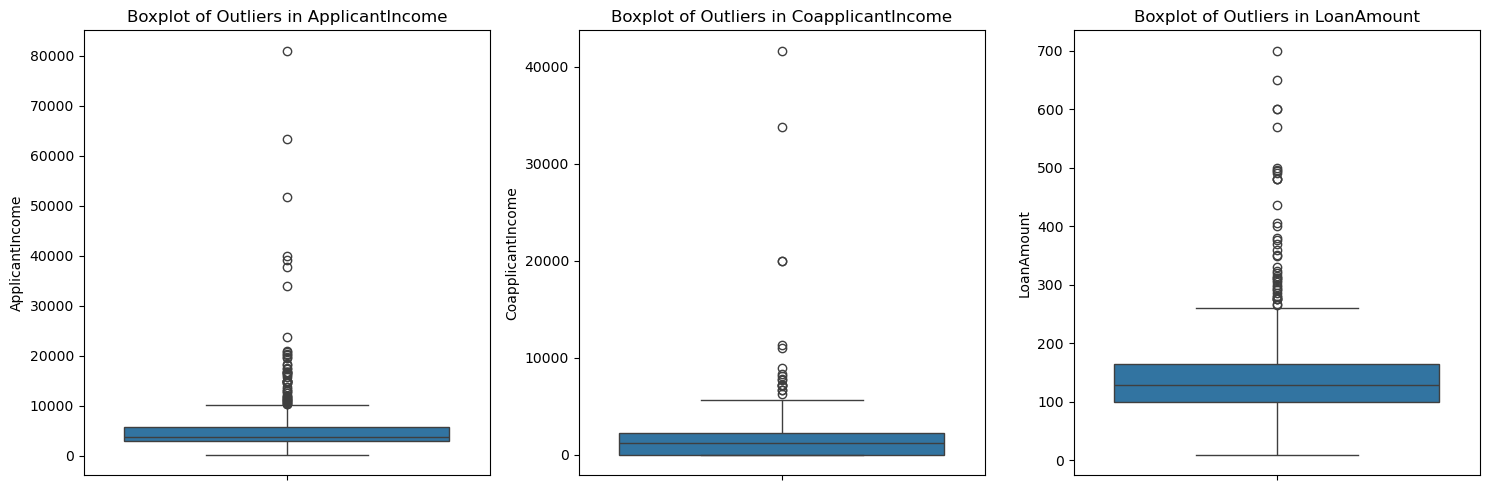

In [15]:
plt.figure(figsize=(15,5))
for i, col in enumerate(["ApplicantIncome", "CoapplicantIncome", "LoanAmount"], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of Outliers in {col}")

plt.tight_layout()
plt.show()

#### Outlier Removal using IQR



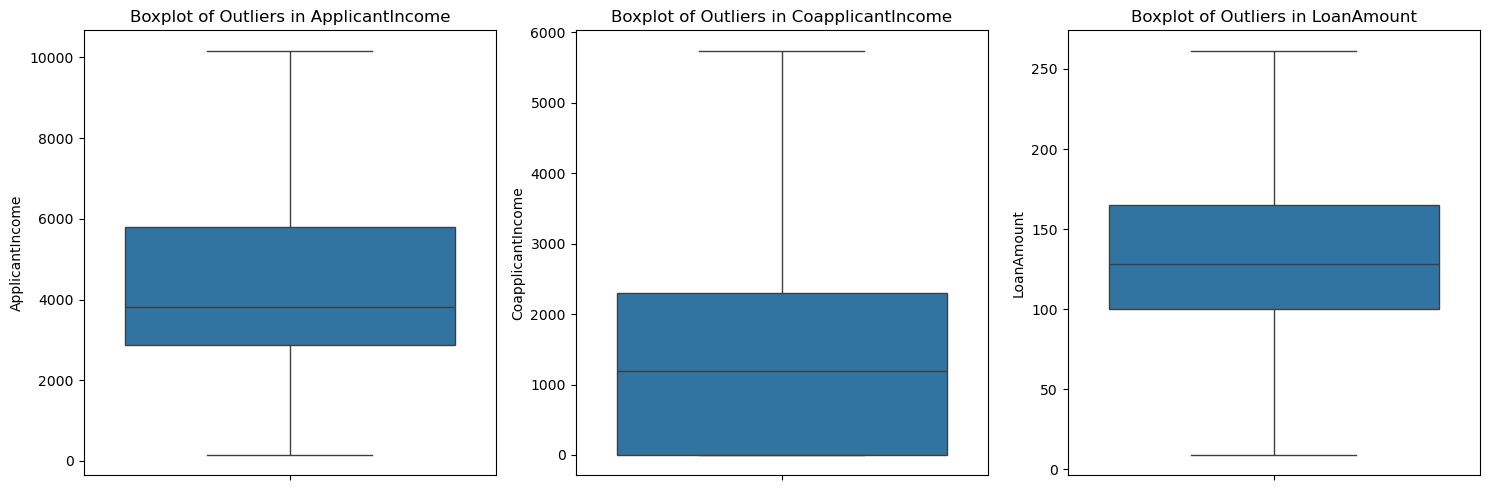

In [19]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

for col in ["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]:
    remove_outliers(df, col)

    
#Plot New Boxplot
plt.figure(figsize=(15,5))
for i, col in enumerate(["ApplicantIncome", "CoapplicantIncome", "LoanAmount"], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of Outliers in {col}")

plt.tight_layout()
plt.show()

### Exploratory Data Analysis

#### EDA of Gender, Married, Dependents, and Education

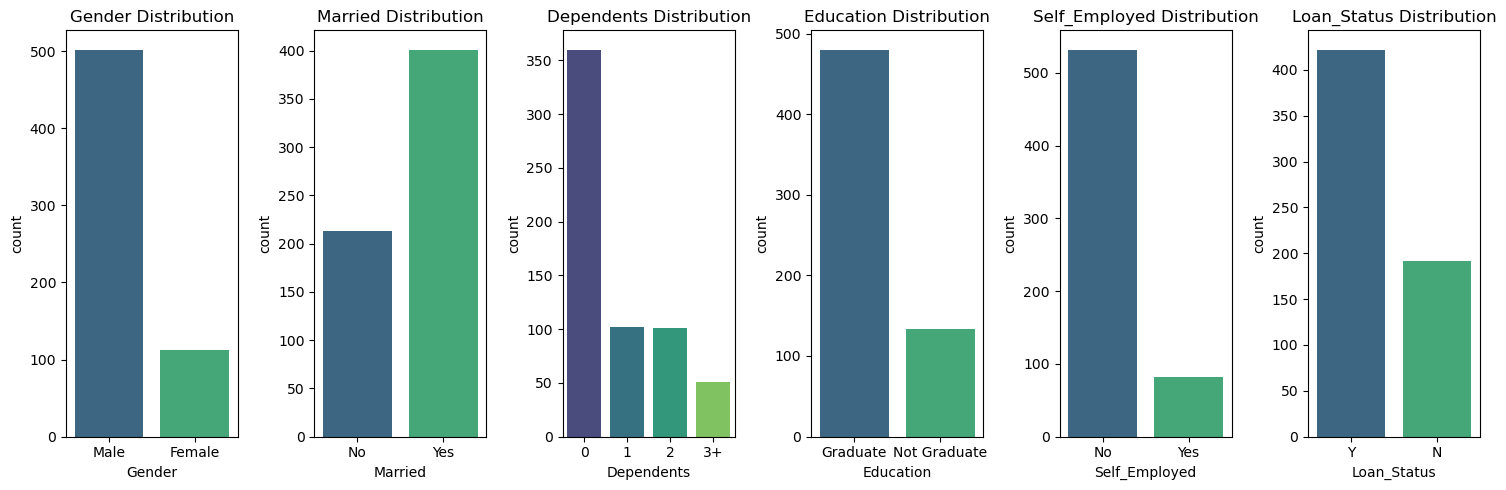

In [39]:
plt.figure(figsize=(15,5))
for i, col in enumerate(["Gender", "Married", "Dependents", "Education", "Self_Employed", "Loan_Status"], 1):
    plt.subplot(1, 6, i)
    sns.countplot(x=df[col], palette="viridis")
    plt.title(f"{col} Distribution")

plt.tight_layout()
plt.show()

#### EDA Loan_Status

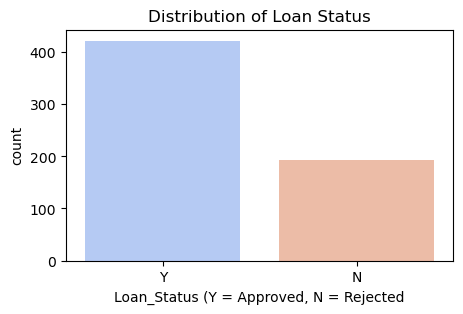

In [41]:
plt.figure(figsize=(5, 3))
sns.countplot(x=df["Loan_Status"], palette="coolwarm")
plt.title("Distribution of Loan Status")
plt.xlabel("Loan_Status (Y = Approved, N = Rejected")
plt.show()

#### EDA of ApplicantIncome, CoapplicantIncome and LoanAmount

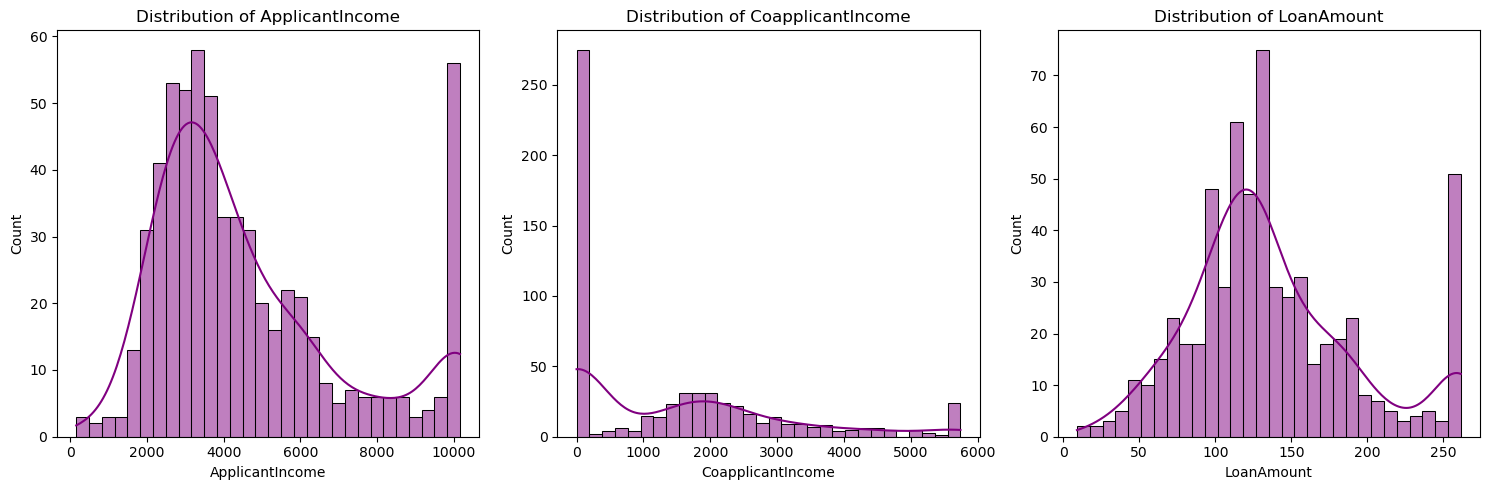

In [26]:
plt.figure(figsize=(15,5))
for i, col in enumerate(["ApplicantIncome", "CoapplicantIncome", "LoanAmount"], 1):
    plt.subplot(1, 3, i)
    sns.histplot(x=df[col], kde=True, bins=30, color="purple")
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

#### EDA of (Credit_History and Property_Area) vs Loan_Status

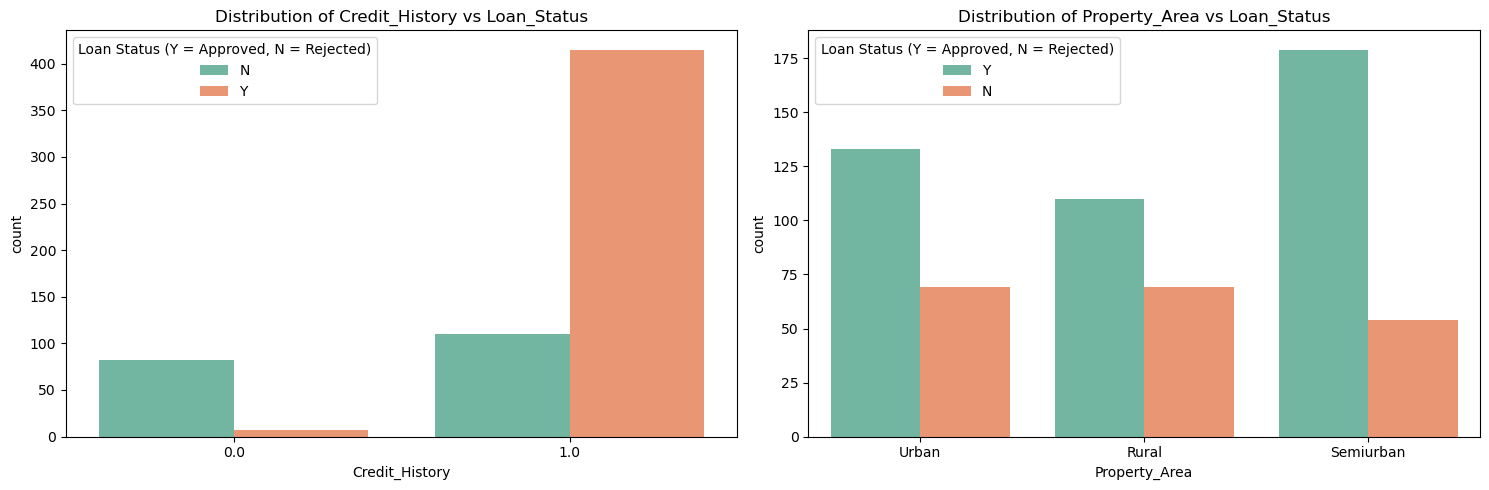

In [45]:
plt.figure(figsize=(15,5))
for i, col in enumerate(["Credit_History", "Property_Area"], 1):
    plt.subplot(1, 2, i)
    sns.countplot(x=df[col], hue=df["Loan_Status"], palette="Set2")
    plt.title(f"Distribution of {col} vs Loan_Status")
    plt.legend(title="Loan Status (Y = Approved, N = Rejected)")

plt.tight_layout()
plt.show()

#### Scatterplot of Income vs LoanAmount and Loan_Status

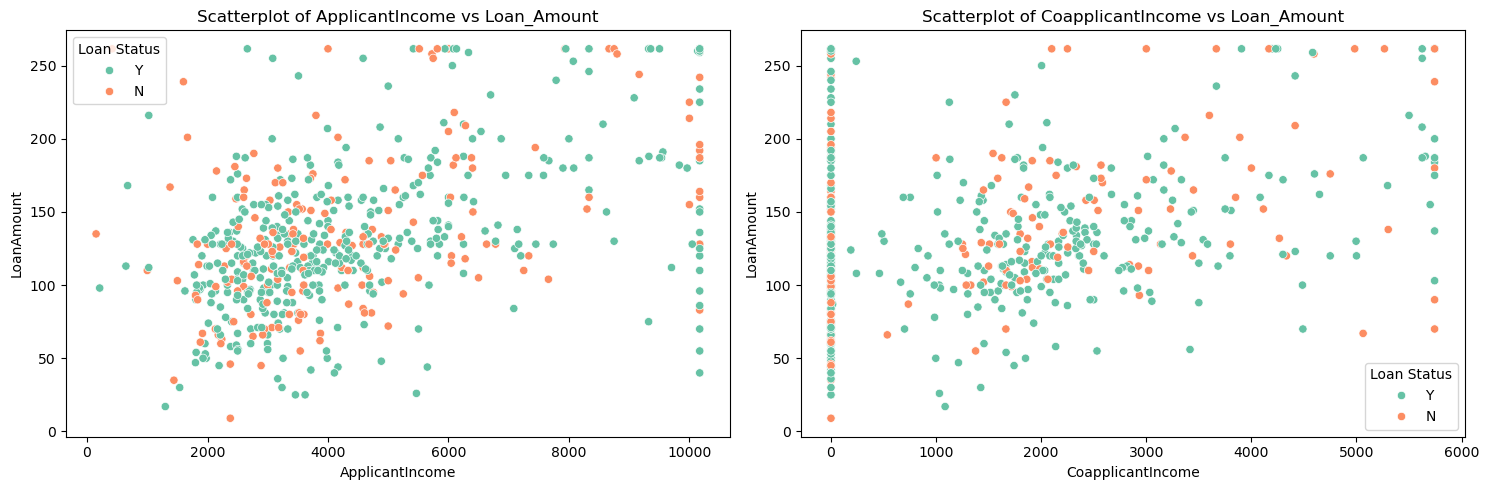

In [47]:
plt.figure(figsize=(15,5))
for i, col in enumerate(["ApplicantIncome", "CoapplicantIncome"], 1):
    plt.subplot(1, 2, i)
    sns.scatterplot(x=df[col], y=df["LoanAmount"], hue=df["Loan_Status"], palette="Set2")
    plt.title(f"Scatterplot of {col} vs Loan_Amount")
    plt.legend(title="Loan Status")

plt.tight_layout()
plt.show()

## Central Tendency and Measure of Dispersion

#### Central Tendency

In [51]:
Central_Tendency = data[["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]].agg(["mean", "median"])

Central_Tendency

,ApplicantIncome,CoapplicantIncome,LoanAmount
mean,5403.459283,1621.245798,146.412162
median,3812.500000,1188.500000,128.000000


In [53]:
modal_values = data[["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]].mode().iloc[0]

modal_values

ApplicantIncome      2500.0
CoapplicantIncome       0.0
LoanAmount            120.0
Name: 0, dtype: float64

In [21]:
#Measures of Dispersion

Dispersion = data[["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]].agg(["std", "var"])

Dispersion

,ApplicantIncome,CoapplicantIncome,LoanAmount
std,6.109042e+03,2.926248e+03,85.587325
var,3.732039e+07,8.562930e+06,7325.190241


## Features Engineering

### Data Standardization and Encoding

In [25]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Standardization of numerical_columns

scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Encoding of categorical_columns

encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = encoder.fit_transform( df[col])


df.head()

#One Hot Encoding of df["dependents"]

#df = pd.get_dummies(df, columns=["Dependents"], drop_first=True)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,0.497164,-0.874587,-0.168041,0.273231,0.411733,2,1
1,1,1,1,1,0,0,-0.013767,0.054395,-0.168041,0.273231,0.411733,0,0
2,2,1,1,0,0,1,-0.652632,-0.874587,-1.280462,0.273231,0.411733,2,1
3,3,1,1,0,1,0,-0.820924,0.578025,-0.311579,0.273231,0.411733,2,1
4,4,1,0,0,0,0,0.558104,-0.874587,0.065209,0.273231,0.411733,2,1


#### Find the Total Income

In [27]:
df["Total_Income"] = df["ApplicantIncome"] + df["CoapplicantIncome"]

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,1,0,0,0,0,0.497164,-0.874587,-0.168041,0.273231,0.411733,2,1,-0.377423
1,1,1,1,1,0,0,-0.013767,0.054395,-0.168041,0.273231,0.411733,0,0,0.040628
2,2,1,1,0,0,1,-0.652632,-0.874587,-1.280462,0.273231,0.411733,2,1,-1.527219
3,3,1,1,0,1,0,-0.820924,0.578025,-0.311579,0.273231,0.411733,2,1,-0.242899
4,4,1,0,0,0,0,0.558104,-0.874587,0.065209,0.273231,0.411733,2,1,-0.316483


#### Check the Distribution of Loan Status and Total Income

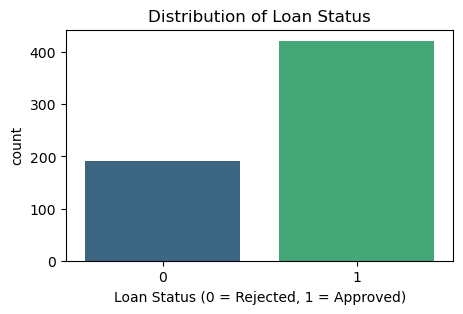

In [27]:
plt.figure(figsize=(5,3))
sns.countplot(x=df["Loan_Status"], palette="viridis")
plt.title("Distribution of Loan Status")
plt.xlabel("Loan Status (0 = Rejected, 1 = Approved)")
plt.ylabel("count")
plt.show()

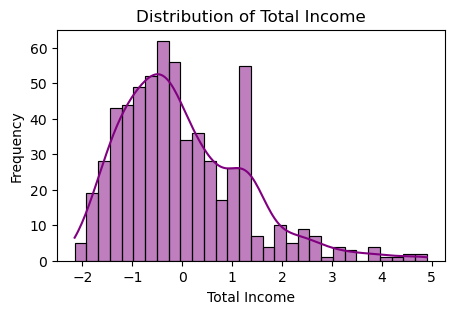

In [31]:
plt.figure(figsize=(5,3))
sns.histplot(df["Total_Income"], kde=True, bins=30, color="purple")
plt.title("Distribution of Total Income")
plt.xlabel("Total Income")
plt.ylabel("Frequency")
plt.show()

#### Visualize the Correlation Heat Map

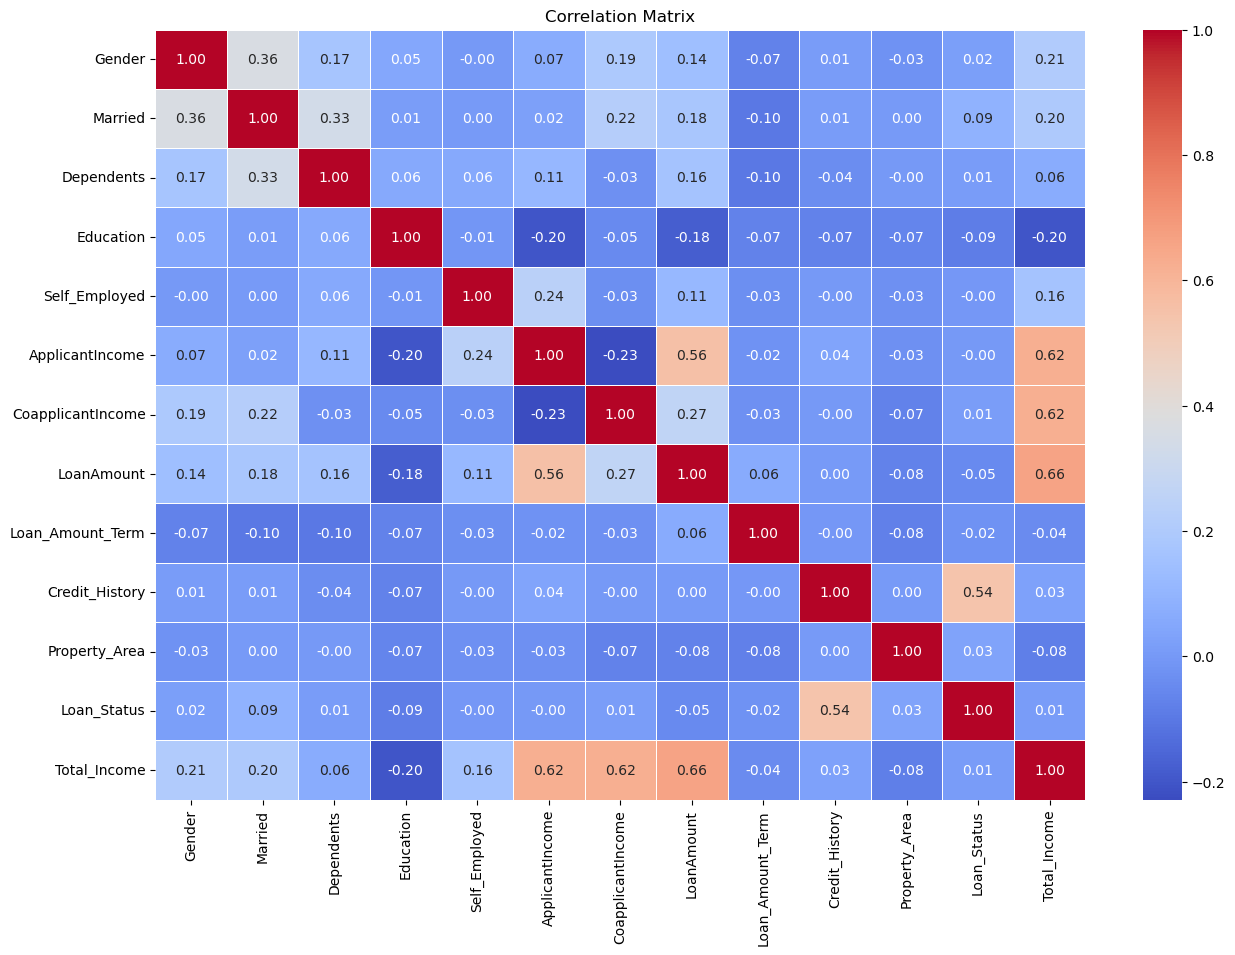

In [49]:
plt.figure(figsize=(15,10))
correlation = df.drop(columns=["Loan_ID"]).corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidth=0.5)
plt.title("Correlation Matrix")
plt.show()

#### Correlation between Income and Loan Amount

In [35]:
correlation_matrix = df[["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]].corr()

correlation_matrix 

,ApplicantIncome,CoapplicantIncome,LoanAmount
ApplicantIncome,1.000000,-0.228956,0.557953
CoapplicantIncome,-0.228956,1.000000,0.265021
LoanAmount,0.557953,0.265021,1.000000


### Probability Distribution and Hypothesis Testing

#### Check the Normality of the Probability Distribution for LoanAmount

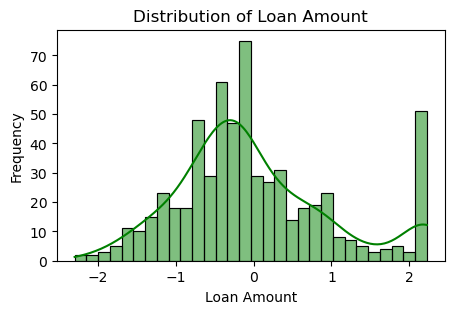

In [37]:
plt.figure(figsize=(5,3))
sns.histplot(df["LoanAmount"], kde=True, bins=30, color="green")
plt.title("Distribution of Loan Amount")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.show()

In [39]:
from scipy import stats   # (or import scipy.stats as stats)

# Use Shapiro-wilk Test to check the normality of distribution 

stats, p_value = stats.shapiro(df["LoanAmount"])
normality_test_result = "Normal" if p_value > 0.05 else "Not Normal"

normality_test_result 

'Not Normal'

#### Hypothesis Testing: Dependence of Gender on Loan Status

In [41]:
from scipy import stats

contingency_table = pd.crosstab(df["Gender"], df["Loan_Status"])
chi2_stat, chi2_p, dof, expected = stats.chi2_contingency(contingency_table)
hypothesis_test_result = "Loan Status is Dependent on Gender" if chi2_p < 0.05 else "Loan Status is Independent on Gender"

print(contingency_table)

print(f"Chi2_stat: {chi2_stat: .2f}, P-value: {chi2_p: .2f}, Hypothesis_Result: {hypothesis_test_result}")

Loan_Status    0    1
Gender               
0             37   75
1            155  347
Chi2_stat:  0.11, P-value:  0.74, Hypothesis_Result: Loan Status is Independent on Gender


In [43]:
contingency_table

Loan_Status,0,1
Gender,,
0,37,75
1,155,347


## Machine Model Building

#### Import ML Model Libraries

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve

### Define the Features and Target Variables

In [33]:
x = df.drop(columns=["Loan_ID", "Loan_Status"])  #Features variable
y = df["Loan_Status"]

#### Split Data into Training-Test using (80-20 Split Size)

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

#### Define the Model

In [55]:
model ={
    "LogisticRegression": LogisticRegression(max_iter=500),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(kernel="linear", probability=True),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metrics="logloss", random_state=42)
    
}

#### Model Training and Evaluation

In [57]:
result = {}
best_model = None
best_model_name = None
best_accuracy = 0

for name, model in model.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    #Save Model using the highest accuracy_score
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_model_name = name

    result[name] = {
        "Accuracy": accuracy,
        "Precision": report["weighted avg"] ["precision"],
        "Recall": report["weighted avg"] ["recall"],
        "F1 Score": report["weighted avg"] ["f1-score"]
    }
        
result_df = pd.DataFrame(result).T.sort_values(by="Accuracy", ascending=False) 

result_df

,Accuracy,Precision,Recall,F1 Score
LogisticRegression,0.853659,0.869641,0.853659,0.840441
SVM,0.853659,0.869641,0.853659,0.840441
KNN,0.837398,0.834181,0.837398,0.831488
Random Forest,0.821138,0.816448,0.821138,0.816521
Gradient Boosting,0.821138,0.816452,0.821138,0.814636
Decision Tree,0.739837,0.743809,0.739837,0.741624


#### Save the Best Model using Joblib

In [59]:
import joblib

joblib.dump(best_model, "best_loan_pred_model.pkl")
print(f"Best Model: {best_model_name}, Accuracy: {best_accuracy:.2%}")

Best Model: LogisticRegression, Accuracy: 85.37%


#### Plot the Confusion Matrix to Visualize Prediction 

In [61]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [63]:
# Compute the y_pred for plotting the Confusion Matrix

y_pred = best_model.predict(x_test)

y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0])

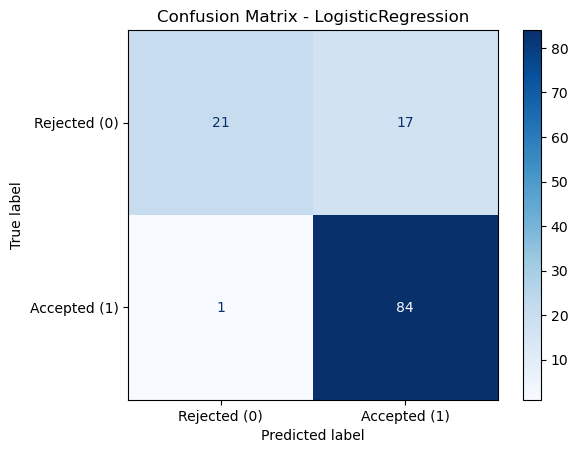

In [65]:
# Load the best_model and test it to make prediction

best_model = joblib.load("best_loan_pred_model.pkl")
y_pred = best_model.predict(x_test)

confu_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confu_matrix, display_labels=["Rejected (0)", "Accepted (1)"])
disp.plot(cmap="Blues", values_format="d")
plt.title(f"Confusion Matrix - {best_model_name}")
plt.show()

#### Plot the ROC-AUC Curve

In [67]:
# Compute the y_prob to be used for plotting the curve
y_proba = best_model.predict_proba(x_test)[:, 1]

y_proba

array([0.06602117, 0.82554086, 0.7592485 , 0.80868122, 0.86409268,
       0.70321993, 0.78620579, 0.80012461, 0.68162161, 0.63272034,
       0.82092064, 0.83471642, 0.81059236, 0.83509061, 0.12471262,
       0.07716978, 0.7809005 , 0.08832856, 0.08115854, 0.77789916,
       0.09338486, 0.68193997, 0.77354375, 0.80487963, 0.82520552,
       0.74414889, 0.75766168, 0.81604392, 0.07448114, 0.80011913,
       0.82168879, 0.81714836, 0.85366924, 0.84363648, 0.66662332,
       0.78061796, 0.06334714, 0.8483273 , 0.74511404, 0.8300619 ,
       0.85673156, 0.75047689, 0.80530151, 0.82418802, 0.76495643,
       0.83380691, 0.81510184, 0.77744877, 0.82945917, 0.61210433,
       0.11612534, 0.85603205, 0.06970929, 0.80577426, 0.64405352,
       0.78253719, 0.08653373, 0.8774397 , 0.84297973, 0.66461459,
       0.0786293 , 0.67600195, 0.7154809 , 0.77672006, 0.79513929,
       0.77805611, 0.82729187, 0.87679223, 0.67356937, 0.80245342,
       0.85440726, 0.12413553, 0.87189385, 0.78101926, 0.86823

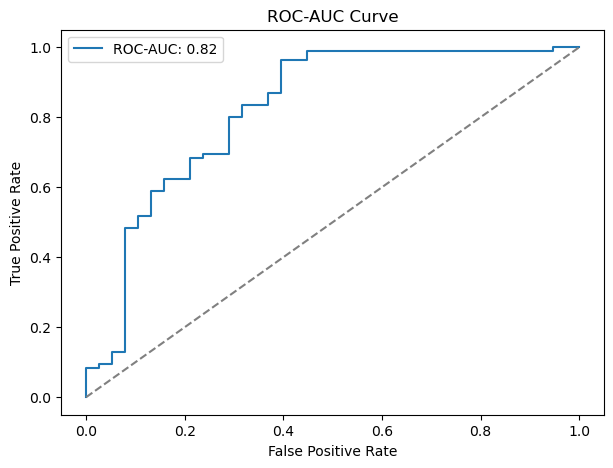

In [69]:
# Plot the ROC-AUC Curve

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"ROC-AUC: {roc_auc_score(y_test, y_proba):.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="grey")
plt.title("ROC-AUC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

### Check if Model supports Feature_Importances_ 

In [71]:
if hasattr(best_model, "feature_importances_"):
    feature_importances = best_model.feature_importances_  #(used to extract feature importance from the best_model)
   
    #Create DataFrame for feature_importance_ 
    feature_importances_df = pd.DataFrame({"Features": x_train.columns, "Importance": feature_importances})
    feature_importances_df = pd.DataFrame.sort(by="Importance", ascending=False)
    
    #Plot and Visualize the Feature_Importance ranking
    plt.figure(figsize=(8,6))
    sns.barplot(x=feature_importances_df["Importance"], y=feature_importances_df["Features"])
    plt.title(f"Feature_Importance of: {best_model_name}")
    plt.xlabel("Importance Score")
    plt.ylabel("Features")
    plt.show()

else: print(f"{best_model_name} does not support feature_importances_")


LogisticRegression does not support feature_importances_


#### Summarize the Feature_Importances_ plot using Shap

In [ ]:
import shap

explainer = shap.Explainer(best_model, x_test)
shap_values = explainer(x_test)

shap.summary_plot(shap_values, x_test)

## Test the Model with sample_input

In [73]:
#Load the best_model

best_model = joblib.load("best_loan_pred_model.pkl")

#Define the sample_input

# ['Gender' = Female, 'Married' = Yes, 'Education' = Graduate, 'Self_Employed' = Yes, 'Property_Area' = Semi_urban, 'Dependents' = +3]
# ['ApplicantIncome' = 30500, 'CoapplicantIncome'= 16000, 'LoanAmount' = 50000, 'Loan_Amount_Term' = 360, 'Credit_History' = 1]

ApplicantIncome = 30500
CoapplicantIncome = 16000
Total_Income = ApplicantIncome + CoapplicantIncome

sample_input = np.array([[0, #Gender
                          1, #Married
                          3, #Dependents
                          1, #Graduate
                          1, #Self_Employed
                          ApplicantIncome,
                          CoapplicantIncome,
                          50000, #LoanAmount
                          360, #Loan_Amount_Term
                          1, # Credit_History
                          2, #Property_Area (0 = Urban, 1 = Rural, 2 = Semiurban)
                          Total_Income    
]])

prediction = best_model.predict(sample_input)
Loan_Status_Prediction = "Approved" if prediction[0] == 1 else "Rejected"

print(f"Loan Status: {Loan_Status_Prediction}") 

Loan Status: Rejected


In [77]:
ApplicantIncome = 50000
CoapplicantIncome = 25000
Total_Income = ApplicantIncome + CoapplicantIncome

sample_input = np.array([[1, #Gender
                          1, #Married
                          0, #Dependents
                          0, #Graduate
                          1, #Self_Employed
                          ApplicantIncome,
                          CoapplicantIncome,
                          550, #LoanAmount
                          360, #Loan_Amount_Term
                          1, # Credit_History
                          1, #Property_Area (0 = Urban, 1 = Rural, 2 = Semiurban)
                          Total_Income    
]])

prediction = best_model.predict(sample_input)
Loan_Status_Prediction = "Approved" if prediction[0] == 1 else "Rejected"

print(f"Loan Status: {Loan_Status_Prediction}") 

Loan Status: Approved


## SMOTE Analysis

In [38]:
from imblearn.over_sampling import SMOTE

In [42]:
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

### Apply the Smote Analysis for a new Model Building

In [46]:
model = {
    "Logistic Regression":LogisticRegression(max_iter=500),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(kernel="linear", probability=True),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metrics="logloss", random_state=42)
}

In [48]:
results = {}
second_best_model = None
second_best_model_name = None
second_best_model_accuracy = 0

for name, model in model.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    if accuracy > second_best_model_accuracy:
        second_best_model_accuracy = accuracy
        second_best_model = model
        second_best_model_name = name

    results[name] = {
        "Accuracy": accuracy,
        "Precision": report["weighted avg"] ["precision"],
        "Recall": report["weighted avg"] ["recall"],
        "F1-score": report["weighted avg"] ["f1-score"],
    }
        

results_df = pd.DataFrame(results).T.sort_values(by="Accuracy", ascending=False)
    
results_df
    

,Accuracy,Precision,Recall,F1-score
Random Forest,0.828402,0.834189,0.828402,0.827739
Gradient Boosting,0.810651,0.819592,0.810651,0.809437
KNN,0.786982,0.787686,0.786982,0.786893
Logistic Regression,0.763314,0.791215,0.763314,0.757807
Decision Tree,0.757396,0.757772,0.757396,0.757345
SVM,0.739645,0.829142,0.739645,0.721204


#### Save the Second Best Model

In [50]:
import joblib

joblib.dump(second_best_model, "second_loan_pred_model.pkl")

print(f"Best_Model_2: {second_best_model_name}, Accuracy: {second_best_model_accuracy:.2%}")

Best_Model_2: Random Forest, Accuracy: 82.84%


#### Plot the Confusion Matrix

<Figure size 700x500 with 0 Axes>

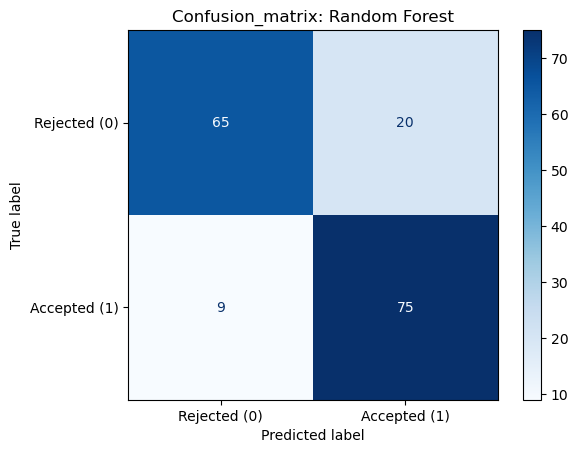

In [62]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

second_best_model = joblib.load("second_loan_pred_model.pkl")
y_pred = second_best_model.predict(x_test)

conf_matr_2 = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matr_2, display_labels=["Rejected (0)", "Accepted (1)"])

plt.figure(figsize=(7,5))
disp.plot(cmap="Blues", values_format="d")
plt.title(f"Confusion_matrix: {second_best_model_name}")
plt.show()

#### Plot the ROC-AUC Curve

In [64]:
y_proba = second_best_model.predict_proba(x_test)[:, 1]

y_proba

array([0.02, 0.54, 0.53, 0.76, 0.08, 0.01, 0.36, 0.57, 0.59, 0.04, 0.88,
       0.78, 0.72, 0.47, 0.86, 0.9 , 0.65, 0.67, 0.95, 0.14, 0.82, 0.59,
       0.82, 0.59, 0.17, 0.67, 0.36, 0.06, 0.55, 0.39, 0.05, 0.08, 0.04,
       0.68, 0.62, 0.05, 0.39, 0.79, 0.72, 0.78, 0.73, 0.56, 0.65, 0.83,
       0.95, 0.63, 0.68, 0.03, 0.1 , 0.32, 0.77, 0.04, 0.03, 0.07, 0.74,
       0.42, 0.39, 0.8 , 0.84, 0.05, 0.3 , 0.37, 0.25, 0.6 , 0.56, 0.22,
       0.7 , 0.23, 0.88, 0.6 , 0.6 , 0.58, 0.18, 0.02, 0.88, 0.57, 0.76,
       0.04, 0.87, 0.36, 0.96, 0.59, 0.86, 0.14, 0.15, 0.73, 0.8 , 0.05,
       0.05, 0.84, 0.62, 0.28, 0.86, 0.6 , 0.14, 0.03, 0.61, 0.73, 0.48,
       0.39, 0.91, 0.63, 0.02, 0.49, 0.68, 0.03, 0.83, 0.8 , 0.85, 0.77,
       0.32, 0.31, 0.67, 0.18, 0.86, 0.74, 0.8 , 0.22, 0.11, 0.93, 0.09,
       0.05, 0.43, 0.02, 0.87, 0.73, 0.48, 0.84, 0.05, 0.62, 0.68, 0.56,
       0.34, 0.45, 0.84, 0.79, 0.04, 0.1 , 0.22, 0.02, 0.68, 0.64, 0.11,
       0.59, 0.77, 0.67, 0.03, 0.12, 0.14, 0.33, 0.

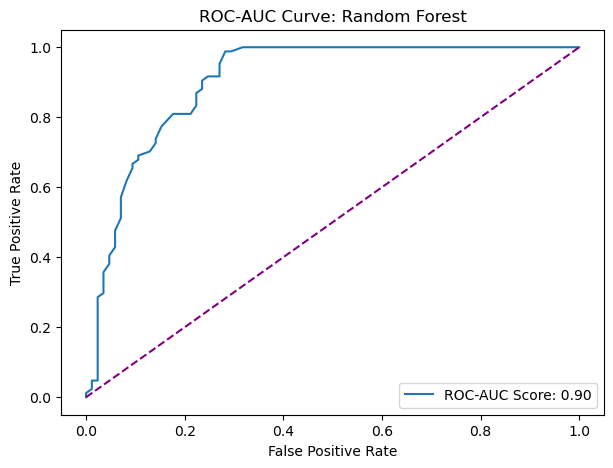

In [74]:
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"ROC-AUC Score: {roc_auc_score(y_test, y_proba):.2f}")
plt.plot([0, 1], [0, 1], linestyle= "--", color="purple")
plt.title(f"ROC-AUC Curve: {second_best_model_name}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

#### Check if Second Model has Feature_Importances_

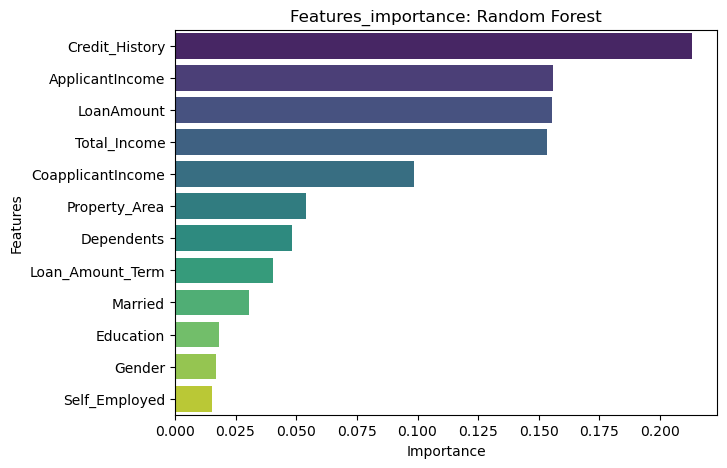

In [94]:
if hasattr(second_best_model, "feature_importances_"):
    feature_importances = second_best_model.feature_importances_
    
    feature_importances_df = pd.DataFrame({"Features": x_train.columns, "Importance": feature_importances})
    feature_importances_df = feature_importances_df.sort_values(by="Importance", ascending=False)
    plt.figure(figsize=(7,5))
    sns.barplot(x=feature_importances_df["Importance"], y=feature_importances_df["Features"], palette="viridis")
    plt.title(f"Features_importance: {second_best_model_name}")
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

else: 
    print(f"{second_best_model_name} does not support feature_importances")


In [ ]:
import shap

explainer = shap.Explainer(second_best_model, x_test)
shap_values = explainer(x_test)
shap.summary_plot(shap_values, x_test)

### Testing of Second Best Model

In [118]:
second_best_model = joblib.load("second_loan_pred_model.pkl")

ApplicantIncome = 15750
CoapplicantIncome = 17800
Total_Income = ApplicantIncome + CoapplicantIncome

trial_input_2 = np.array([[0, #Gender (1 = Male, 0 = Female)
                          1, #Married (1 = Yes, 0 = No)
                          3, #Dependents (e.g., 0, 1, 2, 3)
                          1, #Graduate (1 = Graduate, 0 = Not Graduate)
                          1, #Self_Employed (1 = Yes, 0 = No)
                          ApplicantIncome, 
                          CoapplicantIncome,
                          5000, #LoanAmount
                          360, #Loan_Amount_Term
                          1, # Credit_History (1 = Good, 0 = Bad)
                          2, #Property_Area (0 = Urban, 1 = Rural, 2 = Semiurban)
                          Total_Income
]])

prediction_trial = second_best_model.predict(trial_input_2)

prediction_trial = "Approved" if prediction_trial[0] == 1 else "Rejected"
    
print(f"Loan_Status: {prediction_trial}")

Loan_Status: Rejected


#### End